In [12]:
# https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C
import mglearn, sys, os, sklearn, math

from IPython.display import display
from scipy import sparse

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d

import seaborn as sns
import pandas as pd
import numpy as np
import graphviz

from sklearn.datasets import (load_breast_cancer,
                              load_boston,
                              make_blobs,
                              make_moons,
                              make_circles,
                              load_iris,
                              fetch_lfw_people,
                              load_digits)
from mglearn.datasets import make_wave, make_forge, load_extended_boston

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_selection import SelectFromModel, RFE

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [2]:
adult_path = os.path.join(mglearn.datasets.DATA_PATH, 'adult.data')
data = pd.read_csv(adult_path, header=None, index_col=False,
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                          'marital-status', 'occupation', 'relationship', 'race',
                          'gender', 'captial-gain', 'capital-loss', 'hours-per-week',
                          'native-country', 'income'])
data = data[['age', 'education', 'marital-status',
             'occupation', 'race', 'gender', 'native-country', 'income']]
display(data.head())

age   education       marital-status          occupation    race   gender  \
0   39   Bachelors        Never-married        Adm-clerical   White     Male   
1   50   Bachelors   Married-civ-spouse     Exec-managerial   White     Male   
2   38     HS-grad             Divorced   Handlers-cleaners   White     Male   
3   53        11th   Married-civ-spouse   Handlers-cleaners   Black     Male   
4   28   Bachelors   Married-civ-spouse      Prof-specialty   Black   Female   

   native-country  income  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
data.columns

Index(['age', 'education', 'marital-status', 'occupation', 'race', 'gender',
       'native-country', 'income'],
      dtype='object')

In [5]:
data_dummies = pd.get_dummies(data)

In [6]:
data_dummies.columns

Index(['age', 'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       

In [7]:
data_dummies.head()

age  education_ 10th  education_ 11th  education_ 12th  education_ 1st-4th  \
0   39                0                0                0                   0   
1   50                0                0                0                   0   
2   38                0                0                0                   0   
3   53                0                1                0                   0   
4   28                0                0                0                   0   

   education_ 5th-6th  education_ 7th-8th  education_ 9th  \
0                   0                   0               0   
1                   0                   0               0   
2                   0                   0               0   
3                   0                   0               0   
4                   0                   0               0   

   education_ Assoc-acdm  education_ Assoc-voc  ...  native-country_ Scotland  \
0                      0                     0  ...                         0   
1                      0                     0  ...                         0   
2                      0                     0  ...                         0   
3                      0                     0  ...                         0   
4                      0                     0  ...                         0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   native-country_ Vietnam  native-country_ Yugoslavia  income_ <=50K  \
0                        0                           0              1   
1                        0                           0              1   
2                        0                           0              1   
3                        0                           0              1   
4                        0                           0              1   

   income_ >50K  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 90 columns]

In [18]:
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']
# .ix depreciated
x = features.values
y = data_dummies['income_ >50K'].values
x.shape

(32561, 39)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(xtrain, ytrain)
logreg.score(xtest, ytest)

0.8317160054047414

In [21]:
# binning

In [24]:
# pg 229
x, y = mglearn.datasets.make_wave(n_samples=100)
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(x)
xpoly = poly.transform(x)
xpoly.shape

(100, 10)

In [25]:
x[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [26]:
xpoly[:5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [27]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

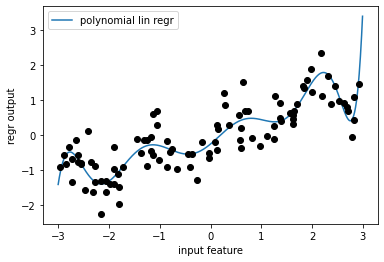

In [29]:
reg = LinearRegression().fit(xpoly, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial lin regr')
plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel('regr output')
plt.xlabel('input feature')
plt.legend(loc='best')

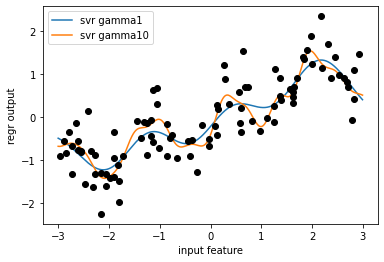

In [32]:
for gamma in [1, 10]: # not 'in range'
    svr = SVR(gamma=gamma).fit(x, y)
    plt.plot(line, svr.predict(line), label='svr gamma{}'.format(gamma))
plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel('regr output')
plt.xlabel('input feature')
plt.legend(loc='best')

In [33]:
boston = load_boston()
xtrain, xtest, ytrain, ytest = train_test_split(boston.data, boston.target, random_state=11)
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
poly = PolynomialFeatures(degree=2).fit(xtrain_scaled)
xtrain_poly = poly.transform(xtrain_scaled)
xtest_poly = poly.transform(xtest_scaled)

In [34]:
xtrain.shape

(379, 13)

In [35]:
xtrain_poly.shape

(379, 105)

In [36]:
ridge = Ridge().fit(xtrain_scaled, ytrain)
print(ridge.score(xtest_scaled, ytest))
ridge = Ridge().fit(xtrain_poly, ytrain)
print(ridge.score(xtest_poly, ytest))

0.6882738548779017
0.7698745635442414


In [38]:
rf = RandomForestRegressor(n_estimators=100).fit(xtrain_scaled, ytrain)
print(rf.score(xtest_scaled, ytest))
rf = RandomForestRegressor(n_estimators=100).fit(xtrain_poly, ytrain)
print(rf.score(xtest_poly, ytest))

0.7948501514127175
0.8124177126729993


In [2]:
rnd = np.random.RandomState(0)
xorg = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
x = rnd.poisson(10*np.exp(xorg))
y = np.dot(xorg, w)

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1)
score = Ridge().fit(xtrain, ytrain).score(xtest, ytest)
print(score)

0.5666273630959082


In [4]:
xtrainlog = np.log(xtrain+1)
xtestlog = np.log(xtest+1)
score2 = Ridge().fit(xtrainlog, ytrain).score(xtestlog, ytest)
print(score2)

0.8325185226016895


In [6]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                         threshold='median')
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
x_with_noise = np.hstack([cancer.data, noise])
xtrain, xtest, ytrain, ytest = train_test_split(x_with_noise,
                                                cancer.target,
                                                random_state=1,
                                                test_size=0.5)

In [7]:
select.fit(xtrain, ytrain)
xtrainl1 = select.transform(xtrain)
xtrain.shape

(284, 80)

In [8]:
xtrainl1.shape

(284, 40)

In [11]:
xtestl1 = select.transform(xtest)
score = LogisticRegression(max_iter=10000).fit(xtrainl1, ytrain).score(xtestl1, ytest)
print(score)

0.9157894736842105


In [13]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(xtrain, ytrain)
xtrainrfe = select.transform(xtrain)
xtestrfe = select.transform(xtest)
score = LogisticRegression(max_iter=10000).fit(xtrainrfe, ytrain).score(xtestrfe, ytest)
print(score)

0.9052631578947369
